# **پیشبینی ورشکستگی شرکت‌ها**
##### مقایسه الگوریتم طبقه بندی کننده و شبکه عصبی در پیشبینی ورشکستگی شرکت‌ها با استفاده از دیتاست جمع آوری شده از شرکت های کشور تایوان



---


## ⚡ **آماده سازی و پیش‌پردازش داده‌ها**

ابتدا کتابخانه‌های لازم را وارد می‌کند.
سپس درایو گوگل را به محیط کولب متصل می‌کند.
داده‌ها را از فایل موجود در درایو می‌خواند و در جدول داده‌ها ذخیره می‌کند.
پنج ردیف اول را نشان می‌دهد.
ستون هدف یعنی وضعیت ورشکستگی را جدا می‌کند.
ویژگی‌های مالی را جداگانه نگه می‌دارد.
نام اصلی ویژگی‌ها را برای استفاده بعدی ذخیره می‌کند.
نام ویژگی‌ها را به صورت شماره‌دار از ۱ تا ۹۵ تغییر می‌دهد.
ستون هدف و ویژگی‌ها را دوباره با هم ترکیب می‌کند تا جدول نهایی ساخته شود.
اندازه جدول و درصد شرکت‌های سالم و ورشکسته را چاپ می‌کند.
پنج ردیف اول ویژگی‌ها و هدف را نمایش می‌دهد تا صحت کار بررسی شود.
این سلول پایه و اساس آماده‌سازی داده‌ها برای مراحل بعدی پروژه است.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

#drive.mount('/content/drive')

In [9]:
#df = pd.read_csv('/content/drive/My Drive/Housh_Mohasebati/Companies Bankruptcy Prediction/data.csv')      * آدرس دیتاست
df = pd.read_csv('D:/AIjourney/projects/Bankruptcy/data.csv')
df.head()

y = df['Bankrupt?']
X = df.drop('Bankrupt?', axis=1)

feature_names = X.columns.tolist()

X.columns = [f'X{i+1}' for i in range(X.shape[1])]

df = pd.concat([y, X], axis=1)

print("Dataset shape:", df.shape)
print("\nClass distribution:")
print(df['Bankrupt?'].value_counts(normalize=True) * 100)

Dataset shape: (6819, 96)

Class distribution:
Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


In [11]:
X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [13]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64



---



## **⚓ تحلیل اکتشافی داده**

ابتدا یک نمودار دایره‌ای رسم می‌کند تا توزیع کلاس‌های سالم و ورشکسته را نشان دهد.
کلاس سالم با رنگ آبی روشن و کلاس ورشکسته با رنگ قرمز روشن نمایش داده می‌شود.
درصد هر کلاس روی نمودار نوشته می‌شود و بخش ورشکسته کمی جدا شده تا بهتر دیده شود.
سپس ویژگی‌هایی که نامشان با ایکس شروع می‌شود را انتخاب می‌کند.
ماتریس همبستگی این ویژگی‌ها را محاسبه می‌کند.
نمودار حرارتی همبستگی را با رنگ‌های گرم و سرد رسم می‌کند تا روابط مثبت و منفی بین ویژگی‌ها مشخص شود.
جفت ویژگی‌هایی که همبستگی مطلق بالای ۰.۹ دارند را پیدا می‌کند.
این جفت‌ها را همراه با مقدار همبستگی و نام اصلی ویژگی‌ها چاپ می‌کند تا ویژگی‌های تکراری یا بسیار مشابه شناسایی شوند.
در ادامه ویژگی‌ها و هدف را دوباره جدا می‌کند.
داده‌ها را به دو بخش آموزش و آزمون تقسیم می‌کند.
تقسیم به گونه‌ای است که نسبت کلاس‌ها در هر بخش حفظ شود.
ویژگی‌ها را مقیاس‌بندی می‌کند تا میانگین صفر و واریانس یک داشته باشند.
این کار روی داده‌های آموزش انجام می‌شود و همان تبدیل روی داده‌های آزمون اعمال می‌گردد.
در نهایت اندازه مجموعه‌های آموزش و آزمون برای ویژگی‌ها و هدف چاپ می‌شود تا آماده‌سازی داده‌ها تأیید شود.
این سلول تحلیل اولیه توزیع کلاس و روابط ویژگی‌ها را انجام می‌دهد و داده‌ها را برای آموزش مدل آماده می‌کند.


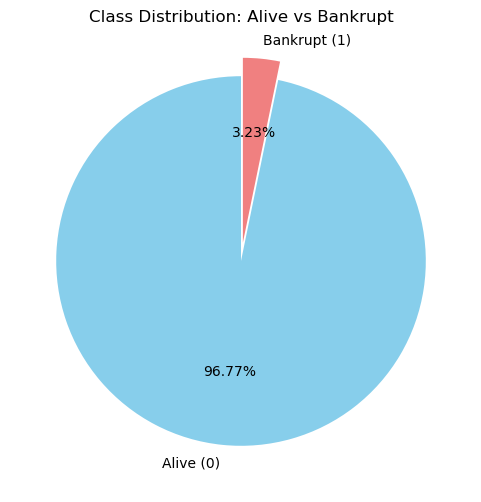

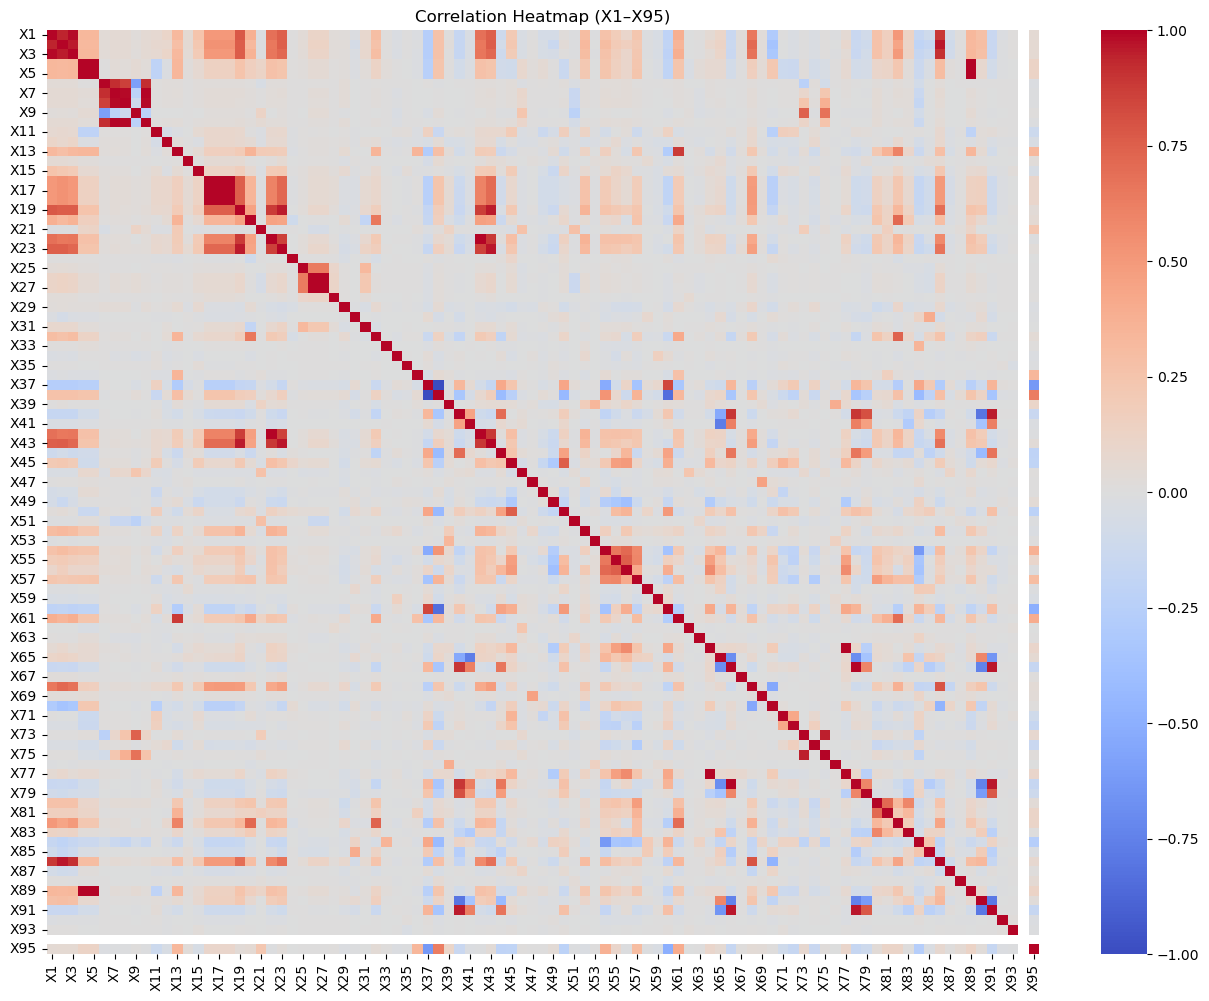


Highly correlated feature pairs (|corr| > 0.9):
X77 — X64 : 1.000 → ( Current Liability to Liability —  Current Liabilities/Liability)
X78 — X66 : 1.000 → ( Current Liability to Equity —  Current Liabilities/Equity)
X38 — X37 : 1.000 → ( Net worth/Assets —  Debt ratio %)
X89 — X4 : 1.000 → ( Gross Profit to Sales —  Operating Gross Margin)
X18 — X17 : 1.000 → ( Net Value Per Share (C) —  Net Value Per Share (A))
X5 — X4 : 1.000 → ( Realized Sales Gross Margin —  Operating Gross Margin)
X89 — X5 : 1.000 → ( Gross Profit to Sales —  Realized Sales Gross Margin)
X17 — X16 : 0.999 → ( Net Value Per Share (A) —  Net Value Per Share (B))
X18 — X16 : 0.999 → ( Net Value Per Share (C) —  Net Value Per Share (B))
X42 — X22 : 0.999 → ( Operating profit/Paid-in capital —  Operating Profit Per Share (Yuan ¥))
X27 — X26 : 0.996 → ( Regular Net Profit Growth Rate —  After-tax Net Profit Growth Rate)
X10 — X7 : 0.994 → ( Continuous interest rate (after tax) —  Pre-tax net Interest Rate)
X3 — X1 : 0.

In [15]:
# (EDA)

plt.figure(figsize=(6,6))
df['Bankrupt?'].value_counts().plot.pie(
    labels=['Alive (0)', 'Bankrupt (1)'],
    autopct='%1.2f%%',
    colors=['skyblue', 'lightcoral'],
    explode=(0, 0.1),
    startangle=90
)
plt.title('Class Distribution: Alive vs Bankrupt')
plt.ylabel('')
plt.show()

feature_cols = [col for col in df.columns if col.startswith('X')]

plt.figure(figsize=(16,12))
corr = df[feature_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (X1–X95)')
plt.show()

# Top highly correlate
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper.unstack().dropna()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.9].sort_values(ascending=False)

print("\nHighly correlated feature pairs (|corr| > 0.9):")
if len(high_corr_pairs) == 0:
    print("No pairs with correlation > 0.9")
else:
    for (f1, f2), c in high_corr_pairs.items():
        orig1 = feature_names[int(f1[1:])-1]
        orig2 = feature_names[int(f2[1:])-1]
        print(f"{f1} — {f2} : {c:.3f} → ({orig1} — {orig2})")

# Split & Scale

X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFinal shapes:")
print('-'*30)
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled:  {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")


---


## ⚙ **مدل رگرسیون لجیستیک**

این سلول مدل رگرسیون لجستیک را می‌سازد و ارزیابی می‌کند.
ابتدا ابزارهای لازم برای ساخت مدل و محاسبه معیارها را وارد می‌کند.
سپس مدل رگرسیون لجستیک را با تنظیمات مناسب ایجاد می‌کند.
تعداد تکرار حداکثر را به ۲۰۰۰ افزایش می‌دهد تا مدل حتماً همگرا شود.
وزن کلاس‌ها را متعادل می‌کند تا به کلاس اقلیت یعنی شرکت‌های ورشکسته بیشتر توجه کند.
دانه تصادفی را ثابت می‌کند تا نتایج تکرارپذیر باشد.
مدل را روی داده‌های آموزش مقیاس‌بندی‌شده آموزش می‌دهد.
پیش‌بینی کلاس و احتمال برای داده‌های آزمون را انجام می‌دهد.
نتایج اصلی را چاپ می‌کند:
دقت کلی
امتیاز اف۱
مساحت زیر منحنی راک
گزارش کامل طبقه‌بندی شامل دقت، فراخوانی و امتیاز اف۱ برای هر کلاس را نشان می‌دهد.
ماتریس درهم‌ریختگی را با رنگ آبی رسم می‌کند تا تعداد پیش‌بینی‌های درست و غلط مشخص شود.
منحنی راک را رسم می‌کند تا قدرت تمایز مدل بین دو کلاس را نشان دهد.
خط مورب نقطه‌چین قدرت مدل تصادفی را نمایش می‌دهد.
این سلول عملکرد مدل رگرسیون لجستیک را به طور کامل ارزیابی و نمایش می‌دهد.

=== Logistic Regression (All 95 Features) ===
Accuracy: 0.8783
F1-Score: 0.3025
ROC AUC:  0.9171

Classification Report:
              precision    recall  f1-score   support

       Alive       0.99      0.88      0.93      1320
    Bankrupt       0.19      0.82      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364



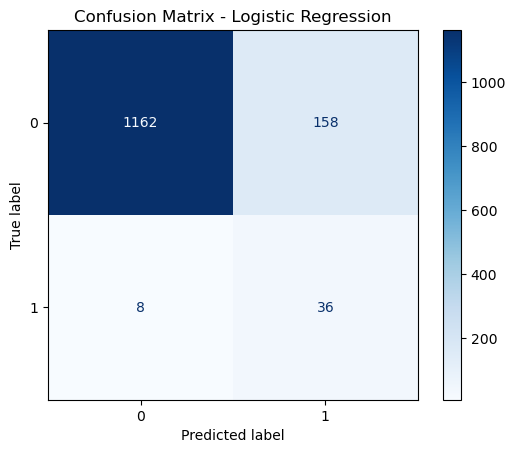

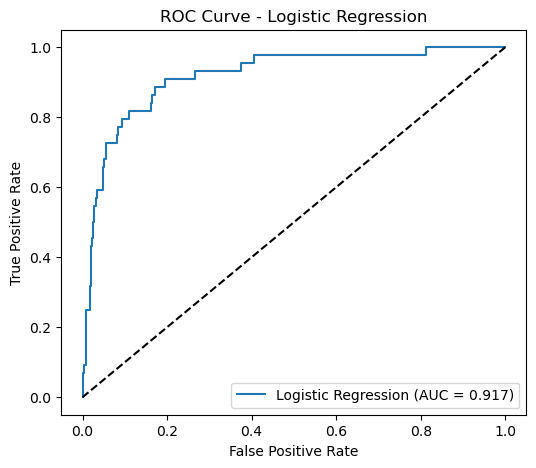

In [17]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve

log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression (All 95 Features) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC:  {roc_auc_score(y_test, y_prob_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Alive', 'Bankrupt']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

---

## **🤖مدل شبکه عصبی**

این سلول مدل شبکه عصبی را می‌سازد و ارزیابی می‌کند.
ابتدا کتابخانه‌های لازم برای ساخت شبکه عصبی و محاسبه وزن کلاس‌ها را وارد می‌کند.
وزن کلاس‌ها را به صورت متعادل محاسبه می‌کند تا به کلاس اقلیت یعنی شرکت‌های ورشکسته وزن بیشتری بدهد.
این وزن‌ها را در یک دیکشنری ذخیره می‌کند و مقدار آن‌ها را چاپ می‌کند.
سپس ساختار شبکه عصبی را تعریف می‌کند.
لایه اول با ۶۴ نورون و فعال‌سازی رلو دارد.
پس از آن لایه دراپ‌اوت با نرخ ۰.۳ برای جلوگیری از بیش‌برازش قرار می‌گیرد.
لایه دوم با ۳۲ نورون و فعال‌سازی رلو دارد.
دوباره لایه دراپ‌اوت با نرخ ۰.۲ اضافه می‌شود.
لایه خروجی با یک نورون و فعال‌سازی سیگموید برای طبقه‌بندی دودویی ساخته می‌شود.
مدل را با بهینه‌ساز آدام و تابع زیان دودویی کامپایل می‌کند.
توقف زودهنگام را تنظیم می‌کند تا اگر خطای اعتبارسنجی بهبود نیابد، آموزش متوقف شود و بهترین وزن‌ها برگردانده شود.
مدل را روی داده‌های آموزش مقیاس‌بندی‌شده آموزش می‌دهد.
آموزش تا حداکثر ۱۰۰ دوره ادامه می‌یابد اما ممکن است زودتر متوقف شود.
از وزن کلاس‌ها در آموزش استفاده می‌کند تا عدم تعادل کلاس‌ها جبران شود.
احتمال و پیش‌بینی کلاس برای داده‌های آزمون را محاسبه می‌کند.
نتایج اصلی را چاپ می‌کند:
دقت کلی
امتیاز اف۱
مساحت زیر منحنی راک
گزارش کامل طبقه‌بندی شامل دقت، فراخوانی و امتیاز اف۱ برای هر کلاس را نشان می‌دهد.
ماتریس درهم‌ریختگی را با رنگ بنفش رسم می‌کند تا تعداد پیش‌بینی‌های درست و غلط مشخص شود.
منحنی راک را رسم می‌کند تا قدرت تمایز مدل بین دو کلاس را نشان دهد.
خط مورب نقطه‌چین قدرت مدل تصادفی را نمایش می‌دهد.
این سلول عملکرد مدل شبکه عصبی را به طور کامل ارزیابی و نمایش می‌دهد.


Class weights: {0: 0.5166698238302709, 1: 15.497159090909092}
Epoch 1/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7908 - loss: 1.1382 - val_accuracy: 0.6929 - val_loss: 0.5575
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7417 - loss: 0.4455 - val_accuracy: 0.7892 - val_loss: 0.4337
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7814 - loss: 0.3959 - val_accuracy: 0.8139 - val_loss: 0.3964
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8226 - loss: 0.3627 - val_accuracy: 0.8414 - val_loss: 0.3602
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8491 - loss: 0.3300 - val_accuracy: 0.8396 - val_loss: 0.3584
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8549 - loss: 0.3440 - val_accuracy: 0.8460 - val_loss: 0.3418
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.3089 - val_accuracy: 0.8607 - val_loss: 0.3099
Epoch 8/100
137/137 ━━━━━━━━━━━━━━

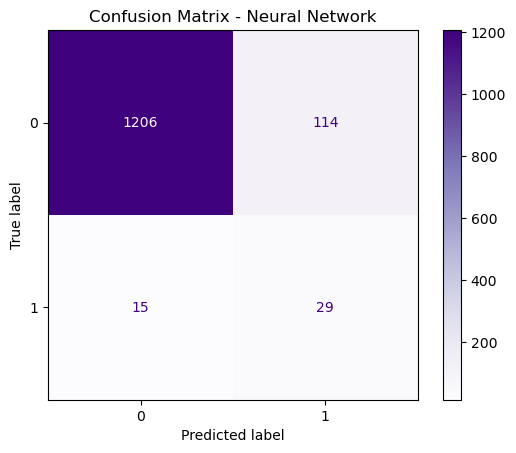

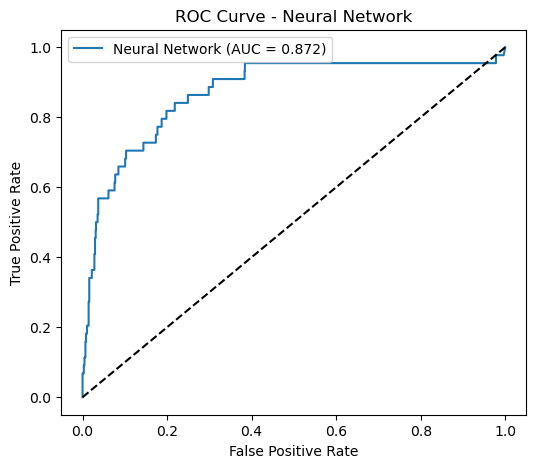

In [21]:
# Neural Network Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

y_train_np = y_train.values if hasattr(y_train, 'values') else np.array(y_train)    # tabdil be numpy.ndarray
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"\nClass weights: {class_weight_dict}")

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)), 
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_np,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    class_weight=class_weight_dict,
                    verbose=1)

y_prob_nn = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

print("\n=== Neural Network (All 95 Features) ===")
print(f"Accuracy: {accuracy_score(y_test_np, y_pred_nn):.4f}")
print(f"F1-Score: {f1_score(y_test_np, y_pred_nn):.4f}")
print(f"ROC AUC:  {roc_auc_score(y_test_np, y_prob_nn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred_nn, target_names=['Alive', 'Bankrupt']))

ConfusionMatrixDisplay.from_predictions(y_test_np, y_pred_nn, cmap='Purples')
plt.title('Confusion Matrix - Neural Network')
plt.show()

fpr, tpr, _ = roc_curve(y_test_np, y_prob_nn)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc_score(y_test_np, y_prob_nn):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.show()





---





## 🌲 مدل درخت تصادفی


این سلول مدل جنگل تصادفی را می‌سازد و ارزیابی می‌کند.
ابتدا کتابخانه‌های لازم برای ساخت مدل جنگل تصادفی و محاسبه معیارهای ارزیابی را وارد می‌کند.
سپس یک مدجنگل تصادفیst با تنظیمات بهینه‌سازی‌شده ایجاد می‌کند.
تعداد درختان را ۲۰۰، حداکثر عمق را ۱۵ و حداقل نمونه‌های لازم برای تقسیم گره را ۵ تنظیم می‌کند.
وزن کلاس‌ها را متعادل می‌کند تا کلاس اقلیت (ورشکسته) در آموزش وزن بیشتری داشته باشد.
دانه تصادفی را ثابت نگه می‌دارد تا نتایج قابل تکرار باشند.
مدل را روی داده‌های آموزش مقیاس‌بندی‌شده آموزش می‌دهد.
پیش‌بینی کلاس و احتمال تعلق به کلاس ورشکستگی را برای داده‌های آزمون محاسبه می‌کند.

=== Random Forest (All 95 Features) ===
Accuracy: 0.9633
F1-Score: 0.4444
ROC AUC:  0.9384

Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      0.98      0.98      1320
    Bankrupt       0.43      0.45      0.44        44

    accuracy                           0.96      1364
   macro avg       0.71      0.72      0.71      1364
weighted avg       0.96      0.96      0.96      1364



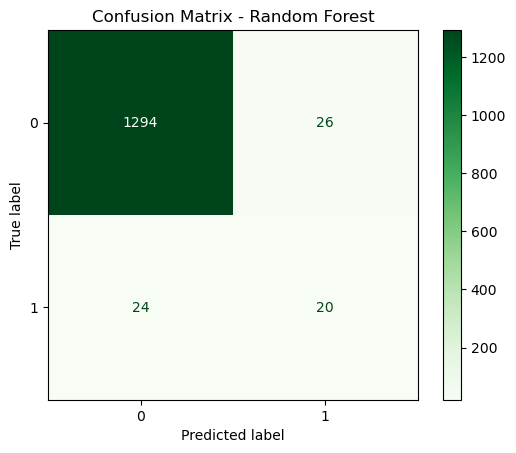

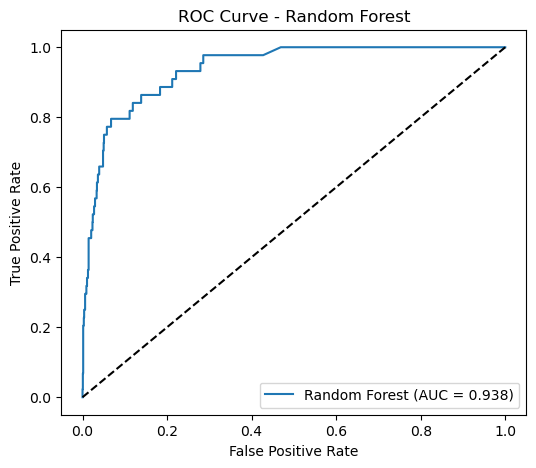

In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest (All 95 Features) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC:  {roc_auc_score(y_test, y_prob_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Alive', 'Bankrupt']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

---

## ⚡ XGBoost مدل


این سلول مدل XGBoost (گرادیان بوستینگ اکسترم) را پیاده‌سازی و ارزیابی می‌کند.
کتابخانه تخصصی XGBoost را برای ساخت مدل‌های تقویتی وارد می‌کند.
یک مدل XGBoost با پارامترهای تنظیم‌شده ایجاد می‌کند.
تعداد درختان را ۱۵۰، حداکثر عمق را ۸ و نرخ یادگیری را ۰.۰۵ تنظیم می‌کند.
برای مدیریت عدم تعادل کلاس‌ها، پارامتر scale_pos_weight را محاسبه و اعمال می‌کند تا وزن بیشتری به کلاس مثبت (ورشکسته) بدهد.
از subsample و colsample_bytree برای کاهش overfitting استفاده می‌کند.
مدل را روی داده‌های آموزش آموزش می‌دهد.
پیش‌بینی‌های کلاس و احتمال را برای داده‌های آزمون تولید می‌کند.

D:\AIjourney\programs\AnacondaFiles\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:57:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost (All 95 Features) ===
Accuracy: 0.9633
F1-Score: 0.4792
ROC AUC:  0.9486

Classification Report:
              precision    recall  f1-score   support

       Alive       0.98      0.98      0.98      1320
    Bankrupt       0.44      0.52      0.48        44

    accuracy                           0.96      1364
   macro avg       0.71      0.75      0.73      1364
weighted avg       0.97      0.96      0.96      1364



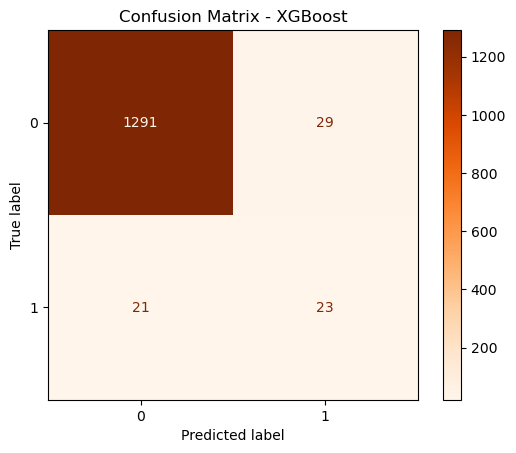

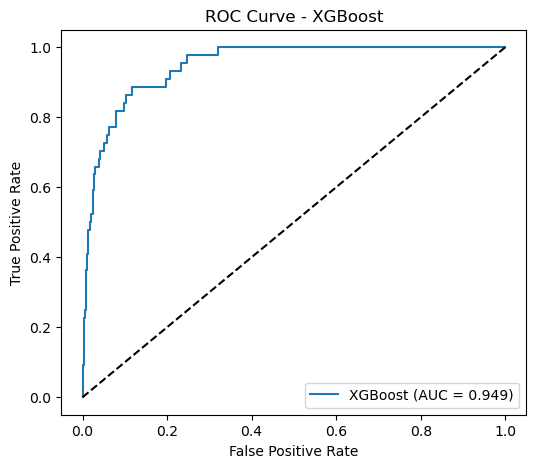

In [31]:

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=150,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Handle class imbalance
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

print("=== XGBoost (All 95 Features) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC:  {roc_auc_score(y_test, y_prob_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Alive', 'Bankrupt']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Oranges')
plt.title('Confusion Matrix - XGBoost')
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

---

## **⚖️ مقایسه عملکرد مدل‌ها**

این سلول مقایسه نهایی عملکرد چهار مدل را انجام می‌دهد.
ابتدا یک جدول با کتابخانه پانداس می‌سازد.
در جدول نام مدل‌ها و معیارهای اصلی مانند دقت کلی، امتیاز اف۱ برای کلاس ورشکسته، مساحت زیر منحنی راک و فراخوانی برای کلاس ورشکسته قرار می‌گیرد.
مقادیر معیارها به صورت دستی وارد می‌شوند تا مقایسه دقیق باشد.
جدول را چاپ و با نمایش زیبا نشان می‌دهد.
سپس جدول را به شکل مناسب برای رسم نمودار تبدیل می‌کند.
نمودار میله‌ای رسم می‌کند تا معیارهای مختلف دو مدل کنار هم مقایسه شوند.
رنگ‌های متفاوت برای هر مدل استفاده می‌شود.
محور عمودی از صفر تا یک تنظیم می‌شود تا مقایسه راحت‌تر باشد.
عنوان و راهنما اضافه می‌شود تا نمودار خواناتر شود.
در ادامه منحنی راک هر دو مدل را محاسبه می‌کند.
نمودار مقایسه منحنی راک دو مدل را در یک شکل رسم می‌کند.
منحنی هر مدل با رنگ متفاوت و مقدار مساحت زیر منحنی نمایش داده می‌شود.
خط مورب نقطه‌چین برای مدل تصادفی اضافه می‌شود.
محورها برچسب می‌خورند و شبکه زمینه برای خوانایی بهتر قرار می‌گیرد.
این سلول با جدول، نمودار میله‌ای و منحنی راک مشترک، مقایسه بصری و عددی عملکرد دو مدل را به طور کامل ارائه می‌دهد و نتیجه‌گیری نهایی پروژه را آسان می‌کند.

Model Performance Comparison (All 4 Models)


,Model,Accuracy,F1-Score (Bankrupt),ROC AUC,Recall (Bankrupt)
0,Logistic Regression,0.8783,0.3025,0.9171,0.8182
1,Neural Network,0.9054,0.3102,0.8718,0.6591
2,Random Forest,0.9633,0.4444,0.9384,0.4545
3,XGBoost,0.9633,0.4792,0.9486,0.5227


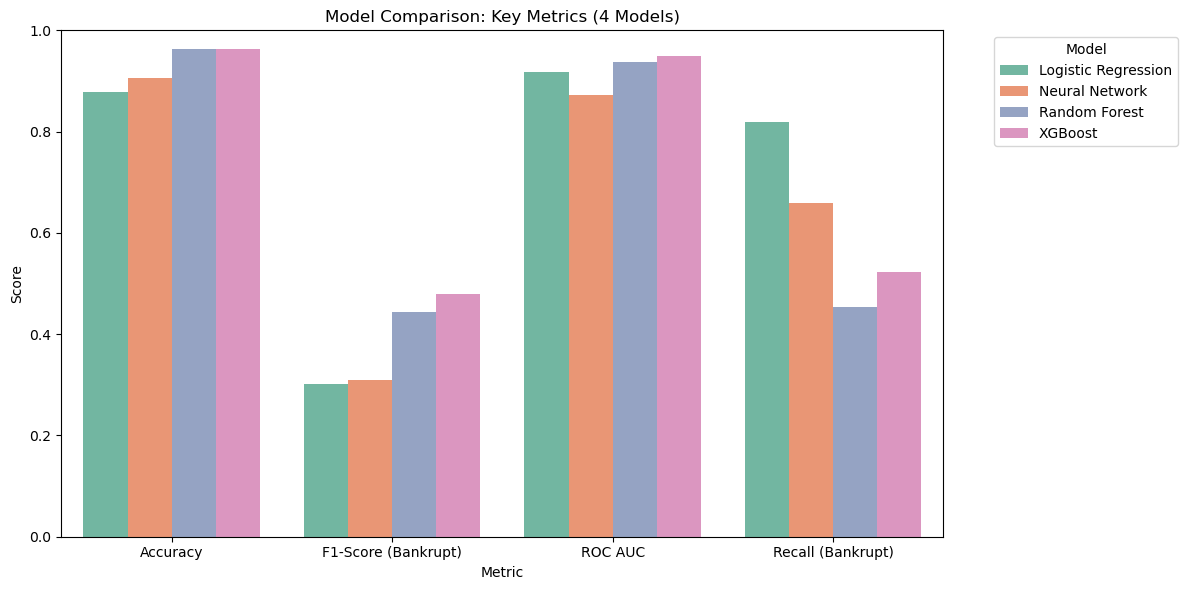

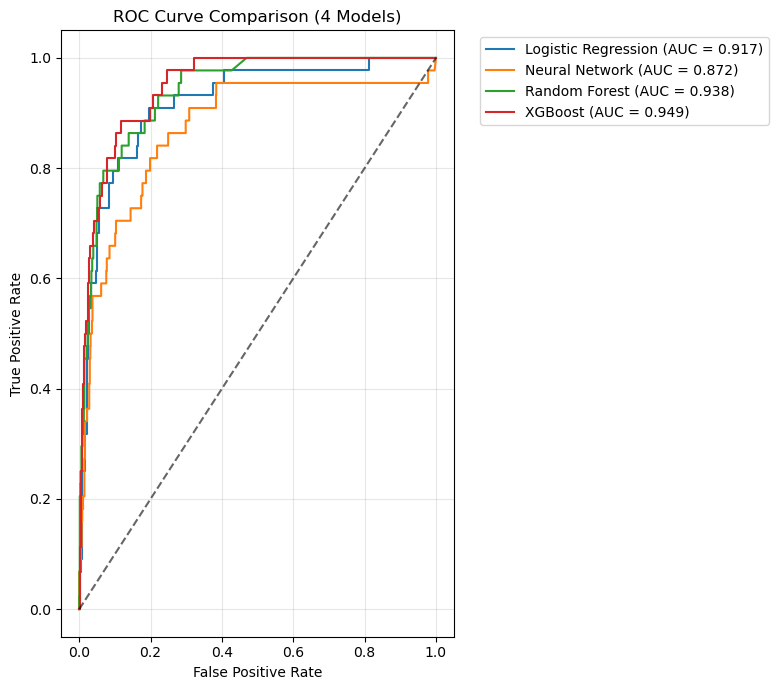

In [37]:

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nn),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1-Score (Bankrupt)': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nn),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_nn),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ],
    'Recall (Bankrupt)': [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_nn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall']
    ]
})

print("Model Performance Comparison (All 4 Models)")
display(results.round(4))

results_melt = results.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12,6))
sns.barplot(data=results_melt, x='Metric', y='Score', hue='Model', palette='Set2')
plt.title('Model Comparison: Key Metrics (4 Models)')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_prob_nn):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.3f})')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (4 Models)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## 📊 جدول رتبه‌بندی نهایی مدل‌ها


این سلول یک تحلیل نهایی و رتبه‌بندی مدل‌ها ارائه می‌دهد.
جدول نتایج را بر اساس امتیاز اف۱ کلاس ورشکسته (مهم‌ترین معیار برای داده‌های نامتعادل) مرتب می‌کند.
یک ستون رتبه به جدول اضافه می‌کند که مدل‌ها را از بهترین به ضعیف‌ترین نشان می‌دهد.
جدول رتبه‌بندی نهایی را با ستون‌های مرتب‌شده نمایش می‌دهد.

In [39]:

results_sorted = results.sort_values('F1-Score (Bankrupt)', ascending=False).reset_index(drop=True)
results_sorted['Rank'] = range(1, len(results_sorted) + 1)

print("🏆 رتبه بتدی نهایی مدل ها بر اساس اف1 ")
display(results_sorted[['Rank', 'Model', 'F1-Score (Bankrupt)', 'ROC AUC', 'Recall (Bankrupt)', 'Accuracy']].round(4))

print("\n🎯 بهترین عملکردها:")
print(f"• Best F1-Score: {results_sorted.loc[0, 'Model']} ({results_sorted.loc[0, 'F1-Score (Bankrupt)']:.4f})")
print(f"• Best ROC AUC: {results.loc[results['ROC AUC'].idxmax(), 'Model']} ({results['ROC AUC'].max():.4f})")
print(f"• Best Recall: {results.loc[results['Recall (Bankrupt)'].idxmax(), 'Model']} ({results['Recall (Bankrupt)'].max():.4f})")

🏆 رتبه بتدی نهایی مدل ها بر اساس اف1 


,Rank,Model,F1-Score (Bankrupt),ROC AUC,Recall (Bankrupt),Accuracy
0,1,XGBoost,0.4792,0.9486,0.5227,0.9633
1,2,Random Forest,0.4444,0.9384,0.4545,0.9633
2,3,Neural Network,0.3102,0.8718,0.6591,0.9054
3,4,Logistic Regression,0.3025,0.9171,0.8182,0.8783



🎯 بهترین عملکردها:
• Best F1-Score: XGBoost (0.4792)
• Best ROC AUC: XGBoost (0.9486)
• Best Recall: Logistic Regression (0.8182)


---

# تحلیل نتایج و نتیجه‌گیری نهایی

## توضیح عملکرد متفاوت مدل‌ها

نتایج مقایسه چهار مدل یادگیری ماشین نشان می‌دهد که **الگوریتم ایکسجی بوست** با کسب امتیاز اف‌یک ۰.۴۷۹۲ بهترین عملکرد کلی را در پیش‌بینی ورشکستگی داشته است. پس از آن **جنگل تصادفی** با امتیاز ۰.۴۴۴۴ در جایگاه دوم قرار گرفته است. در حالی که **رگرسیون لجستیک** و **شبکه عصبی** به ترتیب امتیازهای ۰.۳۰۲۵ و ۰.۳۱۰۲ را کسب کرده‌اند.

این تفاوت عملکرد با وجود اینکه مدل‌های رگرسیون لجستیک و شبکه عصبی نرخ فراخوانی بالاتری داشتند (به ترتیب ۰.۸۱۸۲ و ۰.۶۵۹۱ در مقابل ۰.۵۲۲۷ و ۰.۴۵۴۵) نیاز به تحلیل دقیق‌تری دارد. نکته کلیدی این است که معیار اف‌یک میانگین هم‌ساز بین دقت و فراخوانی است. مدل‌های رگرسیون لجستیک و شبکه عصبی اگرچه شرکت‌های ورشکسته بیشتری را شناسایی کردند (فراخوانی بالا) اما در مقابل تعداد زیادی از شرکت‌های سالم را نیز به اشتباه به عنوان ورشکسته طبقه‌بندی کردند (دقت پایین). این عدم تعادل باعث کاهش امتیاز اف‌یک آن‌ها شده است.

در مقابل، مدل‌های ایکسجی بوست و جنگل تصادفی تعادل بهتری بین شناسایی شرکت‌های ورشکسته واقعی و جلوگیری از اعلام هشدارهای کاذب ایجاد کرده‌اند. آن‌ها ممکن است تعداد کمتری از ورشکستگی‌های واقعی را شناسایی کنند اما خطای شناسایی شرکت‌های سالم به عنوان ورشکسته را نیز به میزان قابل توجهی کاهش داده‌اند.

## تفسیر مساحت زیر منحنی

مساحت زیر منحنی راک نیز عملکرد برتر مدل‌های ایکسجی بوست و جنگل تصادفی را تأیید می‌کند. ایکسجی بوست با امتیاز ۰.۹۴۸۶ بالاترین توانایی تفکیک بین دو کلاس را نشان داده است. این به معنای آن است که این مدل می‌تواند به طور مؤثرتری شرکت‌های ورشکسته را با احتمال بالاتری نسبت به شرکت‌های سالم رتبه‌بندی کند. مدل جنگل تصادفی با امتیاز ۰.۹۳۸۴ در جایگاه دوم و پس از آن رگرسیون لجستیک با ۰.۹۱۷۱ و شبکه عصبی با ۰.۸۷۱۸ قرار دارند.

## انتخاب مدل نهایی بر اساس نیاز کسب‌وکار

انتخاب مدل نهایی برای استفاده در محیط عملیاتی به اولویت‌های کسب‌وکار بستگی دارد. اگر هدف اصلی شناسایی حداکثری شرکت‌های در معرض ورشکستی است و منابع کافی برای بررسی موارد مثبت کاذب وجود دارد، مدل رگرسیون لجستیک با فراخوانی ۰.۸۱۸۲ گزینه مناسب‌تری خواهد بود. این مدل ۸۱.۸ درصد موارد ورشکسته واقعی را شناسایی می‌کند.

اما اگر منابع بررسی محدود است و هدف کاهش هشدارهای کاذب و تمرکز بر موارد با احتمال بالای ورشکستگی است، مدل ایکسجی بوست با حفظ تعادل بین دقت و فراخوانی انتخاب بهینه‌تری است. این مدل اگرچه تنها ۵۲.۳ درصد موارد ورشکسته را شناسایی می‌کند، اما دقت پیش‌بینی‌های مثبت آن به مراتب بالاتر است.

## جمع‌بندی

پروژه حاضر نشان داد که برای مسائل طبقه‌بندی با داده‌های نامتعادل مانند پیش‌بینی ورشکستگی، معیارهای ارزیابی باید با دقت انتخاب شوند. دقت کلی می‌تواند گمراه‌کننده باشد و معیارهای ویژه‌ای مانند اف‌یک، فراخوانی و مساحت زیر منحنی راک اطلاعات ارزشمندتری ارائه می‌دهند. در این مطالعه، مدل ایکسجی بوست با کسب بالاترین امتیاز اف‌یک و مساحت زیر منحنی راک، بهترین تعادل بین شناسایی موارد مثبت واقعی و جلوگیری از هشدارهای کاذب را ایجاد کرده است. با این حال، انتخاب نهایی مدل باید با توجه به هزینه‌های خطا و اولویت‌های خاص هر کاربرد انجام پذیرد.